### 들어가는 말
본 자료는 우석진 교수님의 "경제 빅데이터 분석을 위한 R" (주)지필미디어. 를 참고로 하였습니다.

광운대학교 경영학부 부교수 김태경

2020년 4월 29일

# 회귀분석
## 분석 목적
* 정책변수와 성과변수 사이의 인과관계 추정

## 예제
* 노동경제학에서 자주 사용하는 Mincer의 임금 방정식을 보자.
* 로그 임금은 교육과 경력에 의해 결정된다고 생각할 때 다음과 같은 방정식을 세울 수 있다.
$$ ln(w_{i})=\beta_{0}+\beta_{1}edu_{i}+\beta_{2}exp_{i}+\epsilon_{i}$$
* 물론 교육은 edu, 경력은 exp, 그리고 첨자 i는 각 개인(individual)을 나타낸다. 엡실론은 미처 설명하지 못한 개인의 차이를 뜻한다.

In [1]:
suppressMessages(suppressWarnings({
    library(AER) #계량경제 패키지
    library(tidyverse) #데이터처리 패키지
    library(ggplot2) #그래프 도구
    library(grid) #그래프 도구
    library(gridExtra) #그래프 도구
}))

함수 suppressMessage()는 메시지를 보여주지 말라는 뜻, 그리고 suppressWarnings()는 경고를 보여주지 말라는 뜻이다.

In [2]:
data(PSID1976)

데이터를 불러오는 data()함수를 사용하여 AER 패키지 안에 있는 PSID1976 데이터를 가져왔다. 이 데이터를 이용해서 회귀분석을 수행해보자.

In [3]:
str(PSID1976)

'data.frame':	753 obs. of  21 variables:
 $ participation: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ hours        : int  1610 1656 1980 456 1568 2032 1440 1020 1458 1600 ...
 $ youngkids    : int  1 0 1 0 1 0 0 0 0 0 ...
 $ oldkids      : int  0 2 3 3 2 0 2 0 2 2 ...
 $ age          : int  32 30 35 34 31 54 37 54 48 39 ...
 $ education    : int  12 12 12 12 14 12 16 12 12 12 ...
 $ wage         : num  3.35 1.39 4.55 1.1 4.59 ...
 $ repwage      : num  2.65 2.65 4.04 3.25 3.6 4.7 5.95 9.98 0 4.15 ...
 $ hhours       : int  2708 2310 3072 1920 2000 1040 2670 4120 1995 2100 ...
 $ hage         : int  34 30 40 53 32 57 37 53 52 43 ...
 $ heducation   : int  12 9 12 10 12 11 12 8 4 12 ...
 $ hwage        : num  4.03 8.44 3.58 3.54 10 ...
 $ fincome      : int  16310 21800 21040 7300 27300 19495 21152 18900 20405 20425 ...
 $ tax          : num  0.722 0.661 0.692 0.781 0.622 ...
 $ meducation   : int  12 7 12 7 12 14 14 3 7 7 ...
 $ feducation   : int  7 7 7 7 14 7 7 3 7 7 ..

데이터의 구조를 보기 위해 str() 함수를 사용했다. 데이터의 클래스는 data.frame이고 753개의 관측치(obs), 21개의 변수(variables)이 있는 것을 확인할 수 있다. 그리고 변수는 각각 participation, hours, youngkids 등이다. 변수를 나타내는 첨자는 $이다. 예를 들어 $participation이라고 하면 "변수 participation"이다. 각 변수의 데이터 특성이 Factor(요인), int(정수), num(실수) 등으로 표시되었다. 그리고 해당 데이터를 조금 보여준다. Factor w/ 2는 요인 2개라는 뜻이고 각각의 요인 수준(levels)은 "no", "yes" 등으로 표시된다. 뒤의 점수는 요인 수준에 따라 할당된 숫자다. 예를 들어 no=1, yes=2 라는 식이라서 2 2 2 라면 yes yes yes가 된다.

In [4]:
attach(PSID1976)

함수 attach()는 해당 데이터의 변수들을 전부 벡터형태로 풀어서 현재의 작업 환경(global environment)에 풀어놓는다. 이를 거둬들이려면 detatch()라고 하면 된다.

In [5]:
ls()

[1] "PSID1976"

현재 작업 환경(environment)의 메모리 객체를 보려면 함수 ls()를 실행한다.

In [6]:
head(PSID1976)

participation,hours,youngkids,oldkids,age,education,wage,repwage,hhours,hage,...,hwage,fincome,tax,meducation,feducation,unemp,city,experience,college,hcollege
yes,1610,1,0,32,12,3.3540,2.65,2708,34,...,4.0288,16310,0.7215,12,7,5.0,no,14,no,no
yes,1656,0,2,30,12,1.3889,2.65,2310,30,...,8.4416,21800,0.6615,7,7,11.0,yes,5,no,no
yes,1980,1,3,35,12,4.5455,4.04,3072,40,...,3.5807,21040,0.6915,12,7,5.0,no,15,no,no
yes,456,0,3,34,12,1.0965,3.25,1920,53,...,3.5417,7300,0.7815,7,7,5.0,no,6,no,no
yes,1568,1,2,31,14,4.5918,3.60,2000,32,...,10.0000,27300,0.6215,12,14,9.5,yes,7,yes,no
yes,2032,0,0,54,12,4.7421,4.70,1040,57,...,6.7106,19495,0.6915,14,7,7.5,yes,33,no,no


In [10]:
tail(hours)

[1] 0 0 0 0 0 0

데이터의 일부를 살펴보기 위해 head()와 tail()을 실행했다. 각각 처음 5개, 뒤의 5개라는 말이다. 보여주는 개수를 정해줄 수도 있다.

In [11]:
head(PSID1976, n=2)

participation,hours,youngkids,oldkids,age,education,wage,repwage,hhours,hage,...,hwage,fincome,tax,meducation,feducation,unemp,city,experience,college,hcollege
yes,1610,1,0,32,12,3.3540,2.65,2708,34,...,4.0288,16310,0.7215,12,7,5,no,14,no,no
yes,1656,0,2,30,12,1.3889,2.65,2310,30,...,8.4416,21800,0.6615,7,7,11,yes,5,no,no


### 데이터 변환 - log 임금
PSID1976의 임금 데이터는 명목임금으로 log값으로 변환되지 않았다. 우리가 추정하려는 식의 임금은 log(임금)이기 때문에 이를 변환해서 사용해야 한다. tidyverse의 mutate()함수를 써서 logwage 변수를 추가하자.

In [12]:
PSID1976<-PSID1976%>%mutate(logwage=log(wage))

In [13]:
names(PSID1976)

[1] "participation" "hours"         "youngkids"     "oldkids"      
 [5] "age"           "education"     "wage"          "repwage"      
 [9] "hhours"        "hage"          "heducation"    "hwage"        
[13] "fincome"       "tax"           "meducation"    "feducation"   
[17] "unemp"         "city"          "experience"    "college"      
[21] "hcollege"      "logwage"

변수의 이름을 출력하는 함수 names()를 써서 확인해보니 logwage가 새로 생성되었다. 

### 무한대 처리
임금이 없으면 0인데, log(0)을 취하면 -무한대가 된다(-Inf). 이 경우에는 계산이 불가능하기 때문에 계산에서 이 부분을 제외시켜야 한다. 가장 간단한 방법은 해당 부분을 결측치(NA)로 바꾸면 된다.

In [44]:
tail(PSID1976$logwage)

[1] NA NA NA NA NA NA

잠깐, 결측치를 확인하는 함수는 is.na()이고 여기에 결측치면 TRUE, 그렇지 않으면 FALSE를 할당한다.

In [28]:
is.na(c(NA,1,2,NA,3,4))

[1]  TRUE FALSE FALSE  TRUE FALSE FALSE

벡터를 결측치로 처리하면 TRUE나 FALSE로 값을 할당하면 된다.

In [34]:
test<-c(NA,1,2,NA,3,4)
test
is.na(test)<-TRUE
test
rm(test)

[1] NA  1  2 NA  3  4

[1] NA NA NA NA NA NA

벡터 test는 잠시 썼던 것이라서 메모리에서 깔끔하게 지웠다. 이때 rm() 함수를 썼다. Remove라는 뜻이다.

무한대를 확인하는 함수는 is.infinite()이다. 함수를 개별 벡터에 적용하여 스칼라 값을 구하는 손쉬운 방법은 간단적용함수(simple apply = sapply())를 사용하는 것이다. 방법은 sapply(데이터,함수이름)이다. 아래의 코드를 살펴보자.

In [35]:
is.na(PSID1976)<-sapply(PSID1976,is.infinite)

In [45]:
tail(PSID1976$logwage)

[1] NA NA NA NA NA NA

무한대가 모두 결측값(NA)로 바뀌었다.

### 로그 임금의 효과
회귀분석에서 Y쪽 변수는 가능한 정규분포를 따라줘야 한다. 특히 데이터의 수가 적다면(1000개 정도도 작은 것) 종모양의 대칭분포에 가까운가를 눈으로 확인하면 좋다. 그래프를 그려서 확인해보자.

우리는 ggplot() 그래프 도구를 사용할 예정이다. 팔레트를 놓기 위해 ggplot(데이터,aes()) 형태로 사용한다. aes()는 그래프의 데이터 요소를 반영하는 함수다. 분포를 볼 때 적당한 것이 히스토그램이다. 히스토그램 위젯은 geom_histogram()이다. 이 위젯을 팔레트 위에 더해주는(+) 과정을 거쳐서 그래프를 그려보기로 한다. 히스토그램으로 데이터를 처리하기 위해 geom_histogram()의 데이터 요소(aes)에 밀도함수 계산을 추가하자. 함수를 추가하기 위해 ..density..라는 코드를 사용했다. 

이외에 투명도(alpha), 채움(fill), 그리고 색상(col)을 두었다. aes 안에 있지 않고 밖에 있다는 점을 눈여겨 보자. 위젯 자체의 속성이고 데이터와는 무관하기 때문이다.

히스토그램을 따라서 정규분포 선을 그어서 비교해보자. 정규분포를 계산하는 확률밀도함수는 dnorm()이다. Density of Normal distribution의 약자다. 색상(color)는 red로 하고 dnorm에 필요한 평균(mean)과 표준편차(sd)를 넘겨주기 위해 args에 리스트(list)를 제출한다.

이외에 labs() 함수를 사용하여 그래프의 x, y 축 이름과 타이틀을 정해주자.

mean()은 평균을 구하는 함수, sd()는 표준편차를 구하는 함수다. na.rm=TRUE라고 하면 결측값을 제외하라는(NA should be removed) 뜻이다.

출력은 print(그래프)로 한다. 이때 귀찮은 메시지를 보기 싫으니 suppressWarnings(suppressMessages())안에 넣어주자.

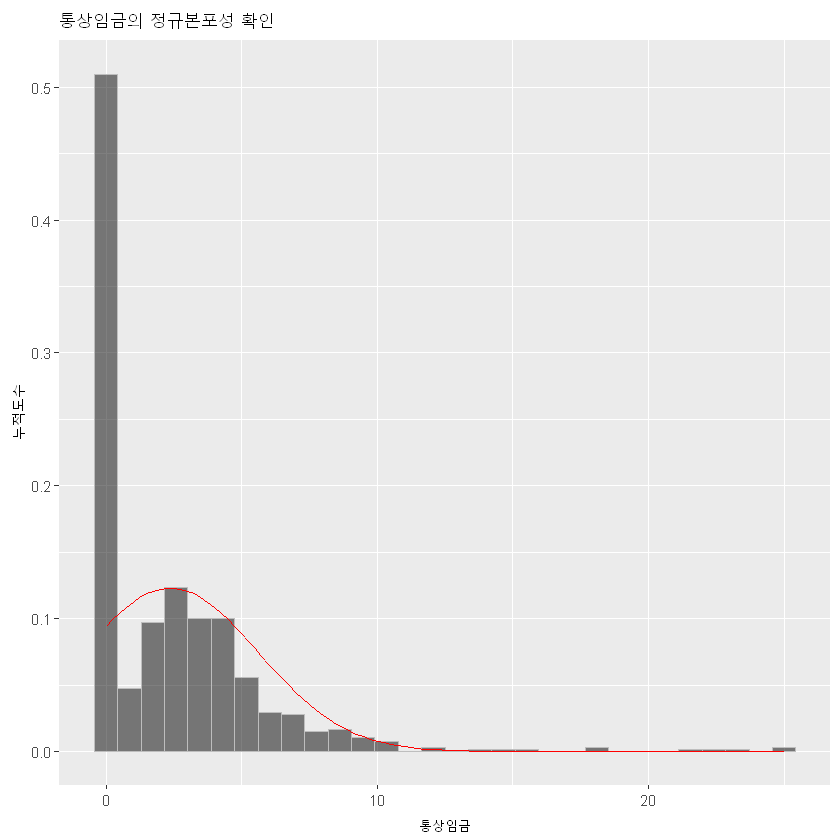

In [43]:
fig1<-ggplot(PSID1976,aes(x=wage))+
    geom_histogram(aes(y=..density..),alpha=0.5,fill='black',col='grey')+
    stat_function(fun=dnorm,color='red',args=list(mean=mean(wage,na.rm=TRUE),sd=sd(wage,na.rm=TRUE)))+
    labs(title="통상임금의 정규본포성 확인",x='통상임금',y='누적도수')
suppressWarnings(suppressMessages(print(fig1)))